### Intel Image 분류 (Kaggle)

##### 데이터 로드

In [10]:
import os

path = 'C://backend_study//metaverse_academy//03.딥러닝//data//'

# tf.keras.preprocessing.image_dataset_from_directory

In [11]:
userlist = os.listdir(path)
userlist

['user.aly',
 'user.crt',
 'user.drt',
 'user.elu',
 'user.frt',
 'user.if1',
 'user.if2',
 'user.if3',
 'user.if5',
 'user.if8',
 'user.il1',
 'user.ilb',
 'user.im1',
 'user.lrt',
 'user.lt1',
 'user.lts',
 'user.mrt',
 'user.nae',
 'user.nld',
 'user.u01',
 'user.u02',
 'user.u03',
 'user.u04',
 'user.u05',
 'user.u06',
 'user.u07',
 'user.u08',
 'user.u09',
 'user.u10',
 'user.u11',
 'user.u12',
 'user.u13',
 'user.u14',
 'user.u17',
 'user.u18',
 'user.u19',
 'user.vly']

In [12]:
import shutil

for user in userlist:

    images_folder = path + '//' + user + '//images'
    label_list = os.listdir(images_folder)
    for label in label_list:
        images = os.listdir(images_folder+'//'+label)
        print(images)
        for img in images:
            shutil.copyfile(images_folder+'//'+label+'//'+img,'C://backend_study//metaverse_academy//03.딥러닝//preprocessed_data//'+label+'//'+img)

['ellipse.aly.0001.png', 'ellipse.aly.0002.png', 'ellipse.aly.0003.png', 'ellipse.aly.0004.png', 'ellipse.aly.0005.png', 'ellipse.aly.0006.png', 'ellipse.aly.0007.png', 'ellipse.aly.0008.png', 'ellipse.aly.0009.png', 'ellipse.aly.0010.png', 'ellipse.aly.0011.png', 'ellipse.aly.0012.png', 'ellipse.aly.0013.png', 'ellipse.aly.0014.png', 'ellipse.aly.0015.png', 'ellipse.aly.0016.png', 'ellipse.aly.0017.png', 'ellipse.aly.0018.png', 'ellipse.aly.0019.png', 'ellipse.aly.0020.png', 'ellipse.aly.0021.png', 'ellipse.aly.0022.png', 'ellipse.aly.0023.png', 'ellipse.aly.0024.png', 'ellipse.aly.0025.png', 'ellipse.aly.0026.png', 'ellipse.aly.0027.png', 'ellipse.aly.0028.png', 'ellipse.aly.0029.png', 'ellipse.aly.0030.png', 'ellipse.aly.0031.png', 'ellipse.aly.0032.png', 'ellipse.aly.0033.png', 'ellipse.aly.0034.png', 'ellipse.aly.0035.png', 'ellipse.aly.0036.png', 'ellipse.aly.0037.png', 'ellipse.aly.0038.png', 'ellipse.aly.0039.png', 'ellipse.aly.0040.png', 'ellipse.aly.0041.png', 'ellipse.aly.00

In [22]:
import tensorflow as tf

data_path = 'C://backend_study//metaverse_academy//03.딥러닝//preprocessed_data'

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_path,
    labels= 'inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(70, 70),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='training',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27292 files belonging to 4 classes.
Using 21834 files for training.


In [23]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_path,
    labels= 'inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(70, 70),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='validation',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27292 files belonging to 4 classes.
Using 5458 files for validation.


In [24]:
class_names = train_ds.class_names
class_names

['ellipse', 'other', 'rectangle', 'triangle']

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model = Sequential()

model.add(Flatten(input_shape=(70,70)))
model.add( Dense (512, activation = 'relu'))
model.add( Dense (256, activation = 'relu'))
model.add( Dense (128, activation = 'relu'))
model.add( Dense (64,activation = 'relu'))
model.add( Dense (32,activation= 'relu') )
model.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
model.compile(optimizer='Adam', loss = 'categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history = model.fit_generator(train_ds,validation_data=valid_ds,epochs=100)

Epoch 1/100


c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


683/683 [==============================] - 4s 6ms/step - loss: 35.4350 - acc: 0.3842 - val_loss: 1.6796 - val_acc: 0.4813
Epoch 2/100
683/683 [==============================] - 4s 5ms/step - loss: 1.3694 - acc: 0.5154 - val_loss: 1.1683 - val_acc: 0.5368
Epoch 3/100
683/683 [==============================] - 4s 6ms/step - loss: 1.1034 - acc: 0.5652 - val_loss: 1.1465 - val_acc: 0.5720
Epoch 4/100
683/683 [==============================] - 5s 7ms/step - loss: 1.2368 - acc: 0.5189 - val_loss: 1.4293 - val_acc: 0.4533
Epoch 5/100
683/683 [==============================] - 5s 7ms/step - loss: 1.0848 - acc: 0.5529 - val_loss: 1.1205 - val_acc: 0.5878
Epoch 6/100
683/683 [==============================] - 5s 7ms/step - loss: 1.3661 - acc: 0.3179 - val_loss: 1.3860 - val_acc: 0.2582
Epoch 7/100
683/683 [==============================] - 5s 7ms/step - loss: 1.3851 - acc: 0.2692 - val_loss: 1.3859 - val_acc: 0.2582
Epoch 8/100
683/683 [==============================] - 5s 7ms/step - loss: 1.385

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

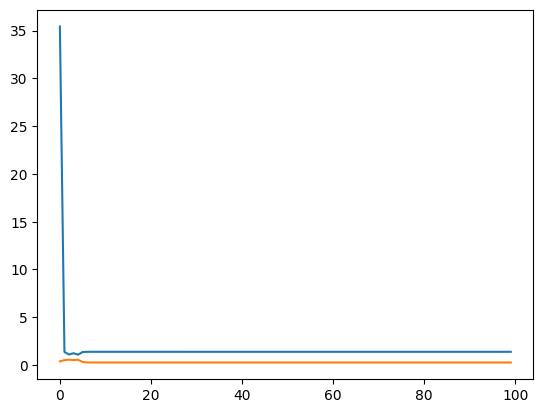

In [43]:
plt.figure()
plt.plot(range(len(loss)),loss)
plt.plot(range(len(acc)),acc)

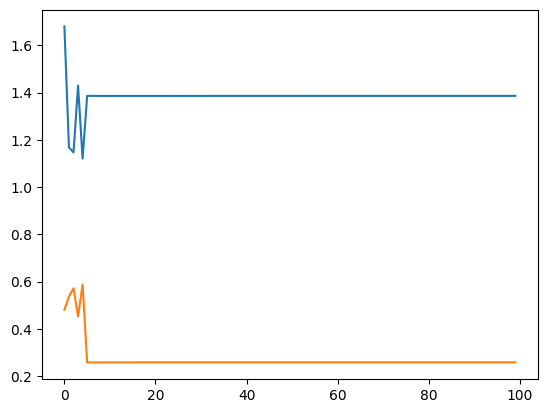

In [44]:
plt.figure()
plt.plot(range(len(val_loss)),val_loss)
plt.plot(range(len(val_acc)),val_acc)

##### train_ds 수정

In [19]:
import tensorflow as tf

data_path = 'C://backend_study//metaverse_academy//03.딥러닝//preprocessed_data'

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_path,
    labels= 'inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(70, 70),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='training',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27292 files belonging to 4 classes.
Using 21834 files for training.


In [20]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = data_path,
    labels= 'inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(70, 70),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='validation',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27292 files belonging to 4 classes.
Using 5458 files for validation.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


model3 = Sequential()

model3.add(Flatten(input_shape=(70,70)))
model3.add( Dense (512, activation = 'relu'))
model3.add( Dense (256, activation = 'relu'))
model3.add( Dense (128, activation = 'relu'))
model3.add( Dense (64,activation = 'relu'))
model3.add( Dense (32,activation= 'relu') )
model3.add( Dense (4,activation='softmax') )

# 다중 분류시 loss : categorical_crossentropy
model3.compile(optimizer='Adam', loss = 'categorical_crossentropy',metrics=['acc'])

# history : 학습 내역 저장
history3 = model3.fit_generator(train_ds,validation_data=valid_ds,epochs=100)

Epoch 1/100


c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


ValueError: in user code:

    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\training.py", line 1053, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\losses.py", line 1991, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis
    File "c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


##### CNN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(70,70,1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(4),)

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit_generator(train_ds,validation_data=valid_ds,epochs=10)

Epoch 1/10


c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


683/683 [==============================] - 33s 8ms/step - loss: 8.3882 - accuracy: 0.2410 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 2/10
683/683 [==============================] - 5s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 3/10
683/683 [==============================] - 5s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 4/10
683/683 [==============================] - 6s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 5/10
683/683 [==============================] - 6s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 6/10
683/683 [==============================] - 5s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 7/10
683/683 [==============================] - 6s 8ms/step - loss: 8.4363 - accuracy: 0.2411 - val_loss: 8.3130 - val_accuracy: 0.2437
Epoch 8/10
683/6